In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_unity = pd.read_csv("data/tcp_endpoint_latency/log_unity.csv", header=None, names=["is_unity", "payload_size", "time"])
df_ros = pd.read_csv("data/tcp_endpoint_latency/log_ros.csv", header=None, names=["is_unity", "payload_size", "time"])

df_unity["payload_size"] = df_unity["payload_size"] / 1024
df_ros["payload_size"] = df_ros["payload_size"] / 1024
unity_data = df_unity[["payload_size", "time"]]
non_unity_data = df_ros[["payload_size", "time"]]

In [9]:
print("ROS samples: {}".format(len(non_unity_data)))
print("Unity samples: {}".format(len(unity_data)))

ROS samples: 21000
Unity samples: 21000


In [10]:
unity_aggregated = unity_data.groupby("payload_size").agg(mean=("time", np.mean), std=("time", np.std))
non_unity_aggregated = non_unity_data.groupby("payload_size").agg(mean=("time", np.mean), std=("time", np.std))

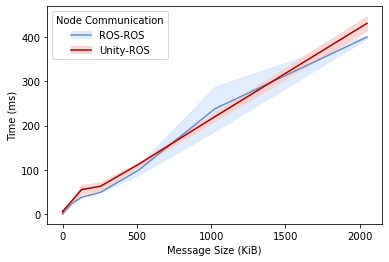

In [11]:
fig, ax = plt.subplots()

fill_1 = plt.fill_between(non_unity_aggregated.index, non_unity_aggregated["mean"] - non_unity_aggregated["std"], non_unity_aggregated["mean"] + non_unity_aggregated["std"], color='#DAE8FC', alpha=0.8)
fill_2 = plt.fill_between(unity_aggregated.index, unity_aggregated["mean"] - unity_aggregated["std"], unity_aggregated["mean"] + unity_aggregated["std"], color='#F8CECC', alpha=0.8)

line_1, = plt.plot(non_unity_aggregated.index, non_unity_aggregated["mean"], '#6C8EBF', label="ROS-ROS")
line_2, = plt.plot(unity_aggregated.index, unity_aggregated["mean"], '#ab0000', label="Unity-ROS")

plt.xlabel("Message Size (KiB)")
plt.ylabel("Time (ms)")
plt.legend([(fill_1, line_1), (fill_2, line_2)], ["ROS-ROS", "Unity-ROS"], title='Node Communication')

plt.savefig("exported_graphs/latency.png", dpi=500)
plt.show()

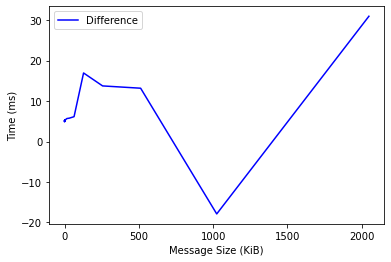

In [12]:
fig, ax = plt.subplots()

line_1, = plt.plot(non_unity_aggregated.index, unity_aggregated["mean"] - non_unity_aggregated["mean"], 'b-', label="ROS-ROS")
# fill_1 = plt.fill_between(non_unity_aggregated.index, non_unity_aggregated["mean"] - non_unity_aggregated["std"], non_unity_aggregated["mean"] + non_unity_aggregated["std"], color='b', alpha=0.2)
# line_2, = plt.plot(unity_aggregated.index, unity_aggregated["mean"], 'r-', label="Unity-ROS")
# fill_2 = plt.fill_between(unity_aggregated.index, unity_aggregated["mean"] - unity_aggregated["std"], unity_aggregated["mean"] + unity_aggregated["std"], color='r', alpha=0.2)

plt.xlabel("Message Size (KiB)")
plt.ylabel("Time (ms)")
plt.legend([line_1], ["Difference"])

plt.savefig("exported_graphs/latency_diff.png", dpi=500)
plt.show()

In [13]:
non_unity_agg = non_unity_aggregated[non_unity_aggregated.index < 1024]
unity_agg = unity_aggregated[non_unity_aggregated.index < 1024]

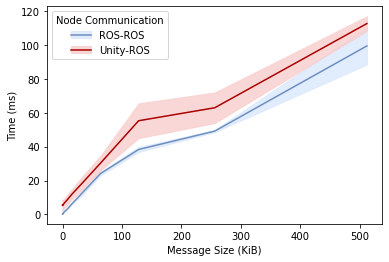

In [14]:
fig, ax = plt.subplots()

fill_1 = plt.fill_between(non_unity_agg.index, non_unity_agg["mean"] - non_unity_agg["std"], non_unity_agg["mean"] + non_unity_agg["std"], color='#DAE8FC', alpha=0.8)
fill_2 = plt.fill_between(unity_agg.index, unity_agg["mean"] - unity_agg["std"], unity_agg["mean"] + unity_agg["std"], color='#F8CECC', alpha=0.8)

line_1, = plt.plot(non_unity_agg.index, non_unity_agg["mean"], '#6C8EBF', label="ROS-ROS")
line_2, = plt.plot(unity_agg.index, unity_agg["mean"], '#ab0000', label="Unity-ROS")

plt.xlabel("Message Size (KiB)")
plt.ylabel("Time (ms)")
plt.legend([(fill_1, line_1), (fill_2, line_2)], ["ROS-ROS", "Unity-ROS"], title='Node Communication')

plt.savefig("exported_graphs/latency2.png", dpi=500)
plt.show()

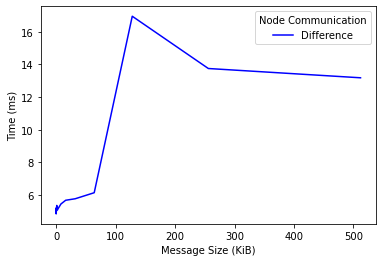

In [15]:
fig, ax = plt.subplots()

line_1, = plt.plot(non_unity_agg.index, unity_agg["mean"] - non_unity_agg["mean"], 'b-', label="ROS-ROS")
# fill_1 = plt.fill_between(non_unity_agg.index, non_unity_agg["mean"] - non_unity_agg["std"], non_unity_agg["mean"] + non_unity_agg["std"], color='b', alpha=0.2)
# line_2, = plt.plot(unity_agg.index, unity_agg["mean"], 'r-', label="Unity-ROS")
# fill_2 = plt.fill_between(unity_agg.index, unity_agg["mean"] - unity_agg["std"], unity_agg["mean"] + unity_agg["std"], color='r', alpha=0.2)

plt.xlabel("Message Size (KiB)")
plt.ylabel("Time (ms)")
plt.legend([line_1], ["Difference"], title='Node Communication')

plt.savefig("exported_graphs/latency2_diff.png", dpi=500)
plt.show()